In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import log_loss
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import *

from sklearn.ensemble import *
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import *
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

from warnings import filterwarnings as fw
fw('ignore')

In [4]:
train = pd.read_csv('../input/deloitte-ml-challenge-predict-loan-defaulters/train.csv')
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [5]:
train.drop(columns=['ID'],inplace=True)

In [6]:
train.isna().sum()

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Accounts Delin

In [7]:
train.describe(include='all')

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463,67463.000000,67463,67463,67463,67463.000000,67463,67463,67463,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
unique,NaN,NaN,NaN,NaN,41,NaN,7,35,3,NaN,3,1,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,BAT3873588,NaN,C,B4,MORTGAGE,NaN,Source Verified,n,Credit card refinancing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,w,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3626,NaN,19085,4462,36351,NaN,33036,67463,30728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36299,NaN,NaN,NaN,NaN,NaN,67340,NaN,NaN,NaN,NaN,NaN,NaN
mean,16848.902776,15770.599114,14621.799323,58.173814,NaN,11.846258,NaN,NaN,NaN,80541.502522,NaN,NaN,NaN,23.299241,0.327127,0.145754,14.266561,0.081437,7699.342425,52.889443,18.627929,NaN,2068.992542,1.143969,59.691578,1.125141,0.021301,NaN,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,NaN,3.718629,NaN,NaN,NaN,45029.120366,NaN,NaN,NaN,8.451824,0.800888,0.473291,6.225060,0.346606,7836.148190,22.539450,8.319246,NaN,2221.918745,5.244365,357.026346,3.489885,0.144385,NaN,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,36.000000,NaN,5.320006,NaN,NaN,NaN,14573.537170,NaN,NaN,NaN,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,NaN,4.736746,0.000003,0.000036,0.000036,0.000000,NaN,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,NaN,9.297147,NaN,NaN,NaN,51689.843335,NaN,NaN,NaN,16.756416,0.000000,0.000000,10.000000,0.000000,2557.000000,38.658825,13.000000,NaN,570.903814,0.021114,1.629818,0.476259,0.000000,NaN,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,NaN,11.377696,NaN,NaN,NaN,69335.832680,NaN,NaN,NaN,22.656658,0.000000,0.000000,13.000000,0.000000,5516.000000,54.082334,18.000000,NaN,1330.842771,0.043398,3.344524,0.780141,0.000000,NaN,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,NaN,14.193533,NaN,NaN,NaN,94623.322785,NaN,NaN,NaN,30.048400,0.000000,0.000000,16.000000,0.000000,10184.500000,69.177117,23.000000,NaN,2656.956837,0.071884,5.453727,1.070566,0.000000,NaN,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000


In [8]:
#dropping the columns having one single values
train.drop(columns=['Payment Plan','Accounts Delinquent'],inplace=True)

In [9]:
train.duplicated().sum()

0

# EDA 

* Target Variable

Text(0.5, 1.0, 'Target data distribution')

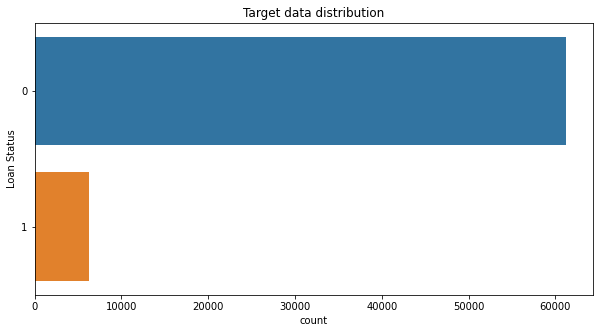

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Loan Status', data=train)
plt.title("Target data distribution")

In [11]:
train.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [12]:
cat = train.select_dtypes('object').columns.to_list()
cat

['Batch Enrolled',
 'Grade',
 'Sub Grade',
 'Employment Duration',
 'Verification Status',
 'Loan Title',
 'Initial List Status',
 'Application Type']

In [13]:
num = train.select_dtypes(exclude='object').columns.to_list()
num

['Loan Amount',
 'Funded Amount',
 'Funded Amount Investor',
 'Term',
 'Interest Rate',
 'Home Ownership',
 'Debit to Income',
 'Delinquency - two years',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Revolving Balance',
 'Revolving Utilities',
 'Total Accounts',
 'Total Received Interest',
 'Total Received Late Fee',
 'Recoveries',
 'Collection Recovery Fee',
 'Collection 12 months Medical',
 'Last week Pay',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Revolving Credit Limit',
 'Loan Status']

In [14]:
for col in num:
    print(f'{col} has {train[col].nunique()} unique values.')

Loan Amount has 27525 unique values.
Funded Amount has 24548 unique values.
Funded Amount Investor has 67441 unique values.
Term has 3 unique values.
Interest Rate has 67448 unique values.
Home Ownership has 67454 unique values.
Debit to Income has 67454 unique values.
Delinquency - two years has 9 unique values.
Inquires - six months has 6 unique values.
Open Account has 36 unique values.
Public Record has 5 unique values.
Revolving Balance has 20582 unique values.
Revolving Utilities has 67458 unique values.
Total Accounts has 69 unique values.
Total Received Interest has 67451 unique values.
Total Received Late Fee has 67380 unique values.
Recoveries has 67387 unique values.
Collection Recovery Fee has 67313 unique values.
Collection 12 months Medical has 2 unique values.
Last week Pay has 162 unique values.
Total Collection Amount has 2193 unique values.
Total Current Balance has 60901 unique values.
Total Revolving Credit Limit has 37708 unique values.
Loan Status has 2 unique val

## Categorical Columns

In [15]:
for col in cat:
    print(f'{col} has {train[col].nunique()} unique values.')

Batch Enrolled has 41 unique values.
Grade has 7 unique values.
Sub Grade has 35 unique values.
Employment Duration has 3 unique values.
Verification Status has 3 unique values.
Loan Title has 109 unique values.
Initial List Status has 2 unique values.
Application Type has 2 unique values.


In [16]:
for col in cat:
    print(f'Unique values in {col} are {train[col].unique()}.')

Unique values in Batch Enrolled are ['BAT2522922' 'BAT1586599' 'BAT2136391' 'BAT2428731' 'BAT5341619'
 'BAT4694572' 'BAT4808022' 'BAT2558388' 'BAT2078974' 'BAT2252229'
 'BAT2333412' 'BAT5849876' 'BAT2833642' 'BAT2803411' 'BAT5525466'
 'BAT5714674' 'BAT2003848' 'BAT4722912' 'BAT3873588' 'BAT1780517'
 'BAT4271519' 'BAT5811547' 'BAT1184694' 'BAT4136152' 'BAT3193689'
 'BAT1467036' 'BAT2575549' 'BAT4351734' 'BAT1104812' 'BAT5924421'
 'BAT1930365' 'BAT1766061' 'BAT5489674' 'BAT3865626' 'BAT5629144'
 'BAT5547201' 'BAT224923' 'BAT3726927' 'BAT3461431' 'BAT1761981'
 'BAT1135695'].
Unique values in Grade are ['B' 'C' 'F' 'A' 'G' 'E' 'D'].
Unique values in Sub Grade are ['C4' 'D3' 'D4' 'C3' 'G5' 'C5' 'A5' 'C2' 'B5' 'B1' 'B4' 'A4' 'B2' 'D2'
 'C1' 'F3' 'D1' 'F2' 'A2' 'A3' 'F1' 'E5' 'B3' 'F4' 'G1' 'F5' 'E1' 'E2'
 'D5' 'G2' 'E4' 'A1' 'G3' 'E3' 'G4'].
Unique values in Employment Duration are ['MORTGAGE' 'RENT' 'OWN'].
Unique values in Verification Status are ['Not Verified' 'Source Verified' 'Verified

#### Batch Enrolled

In [17]:
#cleanining batch enrolled to make it integer type
train['Batch Enrolled'] = [bat[3:] for bat in train['Batch Enrolled']]
train['Batch Enrolled'] = pd.to_numeric(train['Batch Enrolled'])


In [18]:
train, val = train_test_split(train,test_size=0.2,shuffle=True, stratify=train['Loan Status'],random_state=0)

In [19]:
train.shape, val.shape

((53970, 32), (13493, 32))

In [20]:
# df = train.copy()

* We are going to make a dataframe containing the % of defaulters for each batch. Note that this  kind of dataframe will be useful for other features.So that we can encode the categorical variables without using One Hot Encoding or Target Encoding

In [21]:
count_df = train.groupby('Batch Enrolled')['Loan Status'].count().sort_values(ascending=False).reset_index()
sum_df = train.groupby('Batch Enrolled')['Loan Status'].sum().sort_values(ascending=False).reset_index()
count_sum_df = pd.merge(count_df,sum_df,how='inner', on='Batch Enrolled')
count_sum_df['Batch_Enrolled%'] = count_sum_df['Loan Status_y']/count_sum_df['Loan Status_x']
count_sum_df.head()

,Batch Enrolled,Loan Status_x,Loan Status_y,Batch_Enrolled%
0,3873588,2926,277,0.094668
1,1586599,2496,259,0.103766
2,1104812,2381,239,0.100378
3,2252229,2042,195,0.095495
4,2803411,1939,167,0.086127


In [22]:
count_sum_df['Batch_Enrolled%'].describe()

count    41.000000
mean      0.092796
std       0.009254
min       0.077055
25%       0.086127
50%       0.093593
75%       0.097765
max       0.121212
Name: Batch_Enrolled%, dtype: float64

<AxesSubplot:xlabel='Batch_Enrolled%', ylabel='Count'>

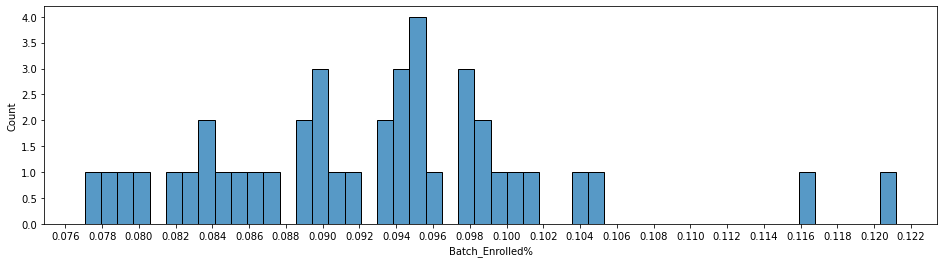

In [23]:
plt.figure(figsize=(16,4))
plt.xticks(np.arange(0.07, 0.13, 0.002))
sns.histplot(count_sum_df['Batch_Enrolled%'],bins=50)

In [24]:
#creating bins
count_sum_df['Bin_Batch_Enrolled']=0
count_sum_df.loc[count_sum_df['Batch_Enrolled%']<0.09, 'Bin_Batch_Enrolled']=0
count_sum_df.loc[(count_sum_df['Batch_Enrolled%']>=0.09)&(count_sum_df['Batch_Enrolled%']<0.1), 'Bin_Batch_Enrolled']=1
count_sum_df.loc[(count_sum_df['Batch_Enrolled%']>=0.1)&(count_sum_df['Batch_Enrolled%']<0.11), 'Bin_Batch_Enrolled']=2
count_sum_df.loc[count_sum_df['Batch_Enrolled%']>=0.11, 'Bin_Batch_Enrolled']=3
count_sum_df = count_sum_df[['Batch Enrolled', 'Bin_Batch_Enrolled']]
count_sum_df.head()

,Batch Enrolled,Bin_Batch_Enrolled
0,3873588,1
1,1586599,2
2,1104812,2
3,2252229,1
4,2803411,0


In [25]:
val = pd.merge(val,count_sum_df,on='Batch Enrolled',how='inner')
train = pd.merge(train,count_sum_df,on='Batch Enrolled',how='inner')

#### Grades

In [26]:
count_df = train.groupby('Grade')['Loan Status'].count().sort_values(ascending=False).reset_index()
sum_df = train.groupby('Grade')['Loan Status'].sum().sort_values(ascending=False).reset_index()
count_sum_df = pd.merge(count_df,sum_df,how='inner', on='Grade')
count_sum_df['Grade%'] = count_sum_df['Loan Status_y']/count_sum_df['Loan Status_x']
count_sum_df = count_sum_df.sort_values(by='Grade%',ignore_index=True).reset_index()

<AxesSubplot:xlabel='Grade', ylabel='Grade%'>

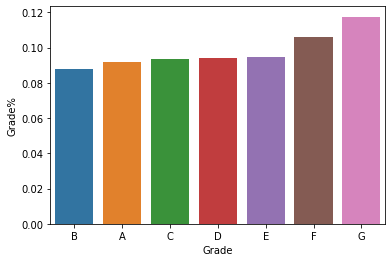

In [27]:
sns.barplot(y ='Grade%',x='Grade',data=count_sum_df)

In [28]:
count_sum_df['rolling'] = count_sum_df['Grade%'].diff()
count_sum_df

,index,Grade,Loan Status_x,Loan Status_y,Grade%,rolling
0,0,B,14951,1313,0.087820,NaN
1,1,A,9666,888,0.091868,0.004048
2,2,C,15275,1430,0.093617,0.001749
3,3,D,6614,622,0.094043,0.000426
4,4,E,5136,487,0.094821,0.000778
5,5,F,1826,194,0.106243,0.011422
6,6,G,502,59,0.117530,0.011287


In [29]:
train.groupby('Grade')['Sub Grade'].nunique()

Grade
A    35
B    35
C    35
D    35
E    35
F    35
G    34
Name: Sub Grade, dtype: int64

In [30]:
dict(zip(count_sum_df['Grade'],count_sum_df['index']))

{'B': 0, 'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [31]:
train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Bin_Batch_Enrolled
0,25730,11547,12604.564480,59,1586599,11.087502,C,C5,MORTGAGE,55022.14613,Source Verified,Debt consolidation,13.050075,2,0,13,0,9506,62.466701,12,f,1270.485253,0.020825,531.852886,0.325771,0,INDIVIDUAL,105,47,45598,6341,0,2
1,18918,8329,6011.876768,59,1586599,11.147376,B,B4,MORTGAGE,60467.97674,Verified,Debt consolidation,33.130316,0,2,14,0,26438,50.593387,15,w,825.435523,0.065797,5.886443,0.740524,0,INDIVIDUAL,41,22,58776,17367,0,2
2,16371,10088,21889.541030,59,1586599,11.677196,B,C4,MORTGAGE,131722.06720,Not Verified,Other,19.033124,0,0,29,0,201,67.627665,17,w,667.139409,0.106359,6.688306,0.716720,0,INDIVIDUAL,114,17,404643,2042,0,2
3,7450,18780,10273.838120,59,1586599,16.687688,B,A5,MORTGAGE,26988.08082,Source Verified,Debt consolidation,14.189902,0,0,13,0,6853,28.595073,20,f,826.776707,0.090862,6.693900,1.378359,0,INDIVIDUAL,22,54,207118,24007,0,2
4,21091,6724,13112.582610,59,1586599,10.005006,C,E5,MORTGAGE,259043.50980,Not Verified,Debt consolidation,15.787920,0,0,14,0,1644,74.176315,17,f,727.146621,0.010983,2.835815,0.910756,0,INDIVIDUAL,56,30,16737,16073,0,2


In [32]:
bins = {'B': 0, 'A': 1, 'C': 1, 'E': 1, 'D': 1, 'F': 2, 'G': 2}
train['Grade'] = train['Grade'].map(bins)
val['Grade'] = val['Grade'].map(bins)

<AxesSubplot:xlabel='Grade', ylabel='Loan Status'>

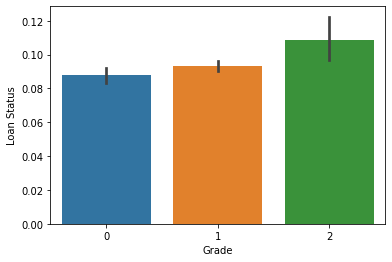

In [33]:
sns.barplot(x='Grade', y='Loan Status', data =train)

#### Sub Grade

In [34]:
count_df = train.groupby(['Grade','Sub Grade'])['Loan Status'].count().sort_values(ascending=False).reset_index()
sum_df = train.groupby(['Grade','Sub Grade'])['Loan Status'].sum().sort_values(ascending=False).reset_index()
count_sum_df = pd.merge(count_df,sum_df,how='inner', on=['Grade','Sub Grade'])
count_sum_df['SubGrade%'] = count_sum_df['Loan Status_y']/count_sum_df['Loan Status_x']
count_sum_df = count_sum_df.sort_values(by='SubGrade%',ignore_index=True).reset_index()
count_sum_df.sort_values(by=['Grade', 'Sub Grade'],ignore_index=True,inplace=True)

<AxesSubplot:xlabel='Sub Grade', ylabel='SubGrade%'>

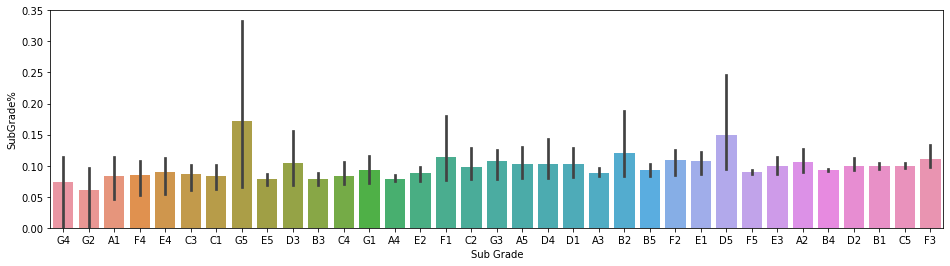

In [35]:
plt.figure(figsize=(16,4))
sns.barplot(y='SubGrade%', x='Sub Grade', data=count_sum_df.sort_values(by='SubGrade%'))

<AxesSubplot:xlabel='Sub Grade', ylabel='SubGrade%'>

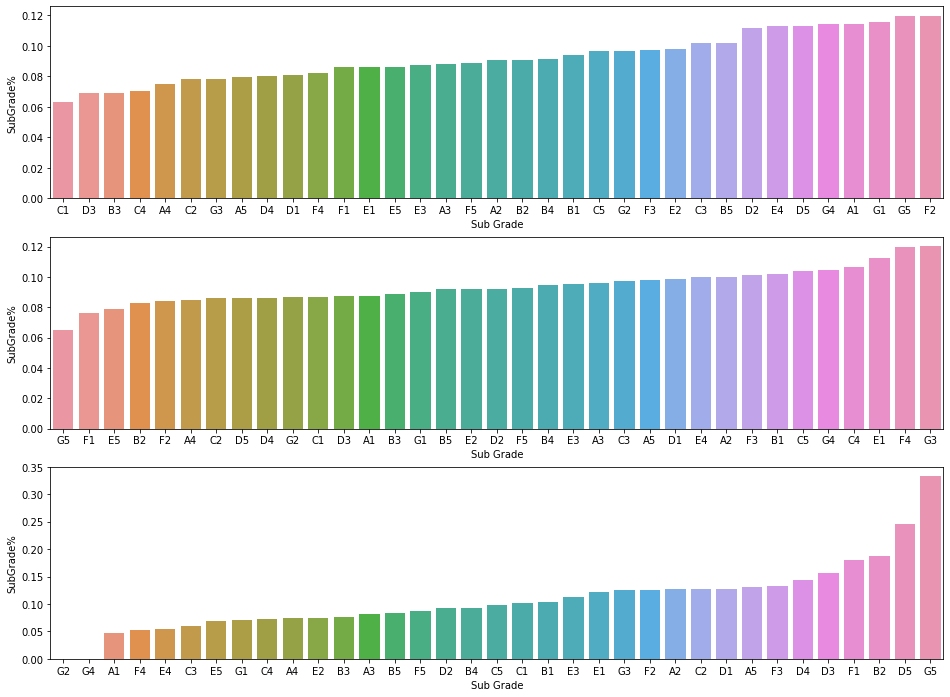

In [36]:
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)
sns.barplot(y='SubGrade%', x='Sub Grade', data=count_sum_df[count_sum_df['Grade']==0].sort_values(by='SubGrade%'))
plt.subplot(3,1,2)
sns.barplot(y='SubGrade%', x='Sub Grade', data=count_sum_df[count_sum_df['Grade']==1].sort_values(by='SubGrade%'))
plt.subplot(3,1,3)
sns.barplot(y='SubGrade%', x='Sub Grade', data=count_sum_df[count_sum_df['Grade']==2].sort_values(by='SubGrade%'))

In [37]:
train = pd.merge(train,count_sum_df[['Grade', 'Sub Grade', 'SubGrade%']],on=['Grade', 'Sub Grade'],how='left')
val  = pd.merge(val,count_sum_df[['Grade', 'Sub Grade', 'SubGrade%']],on=['Grade', 'Sub Grade'],how='left')

In [38]:
corr = train.corr()
corr['Loan Status'].abs().sort_values(ascending=False).head()

Loan Status           1.000000
SubGrade%             0.050394
Bin_Batch_Enrolled    0.023811
Grade                 0.013381
Public Record         0.010227
Name: Loan Status, dtype: float64

In [39]:
corr = val.corr()
corr['Loan Status'].abs().sort_values(ascending=False).head(20)

Loan Status                     1.000000
Total Collection Amount         0.024069
Total Received Late Fee         0.022485
Delinquency - two years         0.018157
Batch Enrolled                  0.015360
Collection 12 months Medical    0.014126
Home Ownership                  0.013302
Grade                           0.012428
Total Current Balance           0.012356
Public Record                   0.012041
SubGrade%                       0.009365
Total Revolving Credit Limit    0.008609
Debit to Income                 0.007912
Last week Pay                   0.007270
Funded Amount                   0.005543
Recoveries                      0.005322
Term                            0.004655
Collection Recovery Fee         0.004381
Total Received Interest         0.004342
Bin_Batch_Enrolled              0.004145
Name: Loan Status, dtype: float64

* The correlation is significant with the target variable.

In [40]:
train.drop(columns='Sub Grade',inplace=True)
val.drop(columns='Sub Grade',inplace=True)

#### Employment Duration

In [41]:
train['Employment Duration'].value_counts()

MORTGAGE    29116
RENT        19294
OWN          5560
Name: Employment Duration, dtype: int64

* Will do one hot encoding on this.

#### Verification Status

In [42]:
train['Verification Status'].value_counts()

Source Verified    26427
Verified           14440
Not Verified       13103
Name: Verification Status, dtype: int64

* Will do one hot encoding on this.

#### Loan Title

In [43]:
train['Loan Title'].value_counts()

Credit card refinancing       24617
Debt consolidation            19784
Debt Consolidation             2856
Other                          1978
Home improvement               1776
Major purchase                  398
Medical expenses                191
Business                        150
Moving and relocation           125
Car financing                   107
Vacation                        100
debt consolidation               87
Consolidation                    82
Home buying                      74
Personal Loan                    65
Debt Consolidation Loan          54
Credit Card Consolidation        53
Home Improvement                 47
consolidation                    44
Consolidation Loan               44
Consolidate                      42
payoff                           42
Green loan                       38
Freedom                          38
consolidate                      37
Credit Card Debt                 33
DEBT CONSOLIDATION               33
Credit Card Refinance       

In [44]:
load_title_dict = {
    'Bathroom': 'Bathroom',
    'Bill Consolidation': 'Bills',
    'Bill Payoff': 'Bills',
    'bills': 'Bills',
    'Business': 'Business',
    'Car financing': 'Car',
    'Car Loan': 'Car',
    'Card Consolidation': 'Cards',
    'cards': 'Cards',
    'Cards': 'Cards',
    'CC': 'Credit Card',
    'CC consolidation': 'Credit Card Consolidation',
    'CC Consolidation': 'Credit Card Consolidation',
    'CC Loan': 'Credit Card Loan',
    'CC Refi': 'Credit Card Refinance',
    'CC Refinance': 'Credit Card Refinance',
    'CC-Refinance': 'Credit Card Refinance',
    'conso': 'Consolidate',
    'consolidate': 'Consolidate',
    'Consolidate': 'Consolidate',
    'CONSOLIDATE': 'Consolidate',
    'Consolidated': 'Consolidate',
    'Consolidation': 'Consolidate',
    'consolidation': 'Consolidate',
    'CONSOLIDATION': 'Consolidate',
    'consolidation loan': 'Consolidate',
    'Consolidation Loan': 'Consolidate',
    'Credit': 'Credit Card',
    'credit card': 'Credit Card',
    'Credit Card': 'Credit Card',
    'credit card consolidation': 'Credit Card',
    'Credit Card Consolidation': 'Credit Card',
    'Credit Card consolidation': 'Credit Card',
    'Credit Card Debt': 'Credit Card Debt',
    'Credit Card Loan': 'Credit Card Loan',
    'Credit card pay off': 'Credit Card Payoff',
    'Credit Card Paydown': 'Credit Card Paydown',
    'Credit card payoff': 'Credit Card Payoff',
    'Credit Card Payoff': 'Credit Card Payoff',
    'Credit Card Refi': 'Credit Card Refinance',
    'Credit Card Refinance': 'Credit Card Refinance',
    'credit card refinance': 'Credit Card Refinance',
    'Credit card refinance': 'Credit Card Refinance',
    'Credit Card Refinance Loan': 'Credit Card Refinance',
    'Credit card refinancing': 'Credit Card Refinance',
    'Credit Cards': 'Credit Card',
    'Credit Consolidation': 'Credit Card Consolidation',
    'Credit Loan': 'Credit Card Loan',
    'credit pay off': 'Credit Card Payoff',
    'Credit payoff': 'Credit Card Payoff',
    'debt': 'Debt Consolidation',
    'Debt': 'Debt Consolidation',
    'Debt Consolidation': 'Debt Consolidation',
    'Debt consolidation': 'Debt Consolidation',
    'DEBT CONSOLIDATION': 'Debt Consolidation',
    'debt consolidation': 'Debt Consolidation',
    'Debt Consolidation 2013': 'Debt Consolidation',
    'Debt Consolidation Loan': 'Debt Consolidation',
    'debt consolidation loan': 'Debt Consolidation',
    'Debt Free': 'Debt Free',
    'debt loan': 'Debt Loan',
    'Debt Loan': 'Debt Loan',
    'Debt Payoff': 'Debt Payoff',
    'Debt payoff': 'Debt Payoff',
    'Debt Reduction': 'Debt Reduction',
    'Dept consolidation': 'Debt Consolidation',
    'Freedom': 'Freedom',
    'Get Debt Free': 'Get Debt Free',
    'get out of debt': 'get out of debt',
    'Getting Ahead': 'Getting Ahead',
    'Green loan': 'Green loan',
    'Home': 'Home',
    'Home buying': 'Home',
    'Home improvement': 'Home',
    'Home Improvement': 'Home',
    'home improvement': 'Home',
    'Home Improvement Loan': 'Home',
    'Home loan': 'Home',
    'House': 'Home',
    'Lending Club': 'Lending Club',
    'Lending loan': 'Lending loan',
    'Loan': 'Loan',
    'Loan 1': 'Loan',
    'Loan Consolidation': 'Loan',
    'loan1': 'Loan',
    'Major purchase': 'Major purchase',
    'Medical': 'Medical',
    'Medical expenses': 'Medical',
    'Medical loan': 'Medical',
    'Moving and relocation': 'Moving and relocation',
    'My Loan': 'My Loan',
    'MYLOAN': 'My Loan',
    'Other': 'Other',
    'Pay Off': 'Pay Off',
    'pay off bills': 'Pay Off',
    'payoff': 'Pay Off',
    'Payoff': 'Pay Off',
    'Personal': 'Personal',
    'personal': 'Personal',
    'Personal Loan': 'Personal',
    'Personal loan': 'Personal',
    'Pool': 'Pool',
    'refi': 'Refinance',
    'Refinance': 'Refinance',
    'Refinance Loan': 'Refinance',
    'relief': 'relief',
    'Vacation': 'Vacation',
    'vacation': 'Vacation',
    'Wedding Loan': 'Wedding Loan'
}
train['Loan Title'] = train['Loan Title'].map(load_title_dict)
val['Loan Title'] = val['Loan Title'].map(load_title_dict)

In [45]:
train['Loan Title'].value_counts()

Credit Card Refinance        24731
Debt Consolidation           22884
Other                         1978
Home                          1945
Major purchase                 398
Consolidate                    317
Medical                        209
Business                       150
Credit Card                    146
Moving and relocation          125
Car                            114
Personal                       112
Vacation                       110
Pay Off                         86
Credit Card Payoff              83
Loan                            60
Refinance                       56
Credit Card Consolidation       45
Credit Card Loan                40
Cards                           38
Freedom                         38
Green loan                      38
My Loan                         34
Credit Card Debt                33
Debt Loan                       30
Bills                           25
Lending Club                    24
Debt Payoff                     21
Debt Free           

<AxesSubplot:xlabel='count', ylabel='Loan Title'>

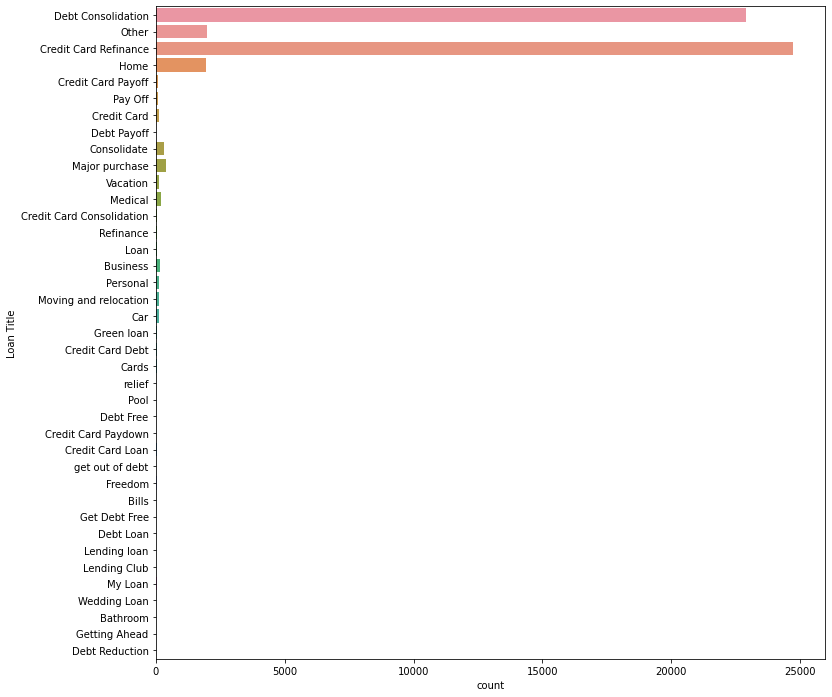

In [46]:
plt.figure(figsize=(12,12))
sns.countplot(y=train['Loan Title'])

In [47]:
train['Debt Consolidation'] = [1 if value=='Debt Consolidation' else 0 for value in train['Loan Title']]
train['Credit Card Refinance'] = [1 if value=='Credit Card Refinance' else 0 for value in train['Loan Title']]

val['Debt Consolidation'] = [1 if value=='Debt Consolidation' else 0 for value in val['Loan Title']]
val['Credit Card Refinance'] = [1 if value=='Credit Card Refinance' else 0 for value in val['Loan Title']]

In [48]:
count_df = train.groupby('Loan Title')['Loan Status'].count().sort_values(ascending=False).reset_index()
sum_df = train.groupby('Loan Title')['Loan Status'].sum().sort_values(ascending=False).reset_index()
count_sum_df = pd.merge(count_df,sum_df,how='inner', on='Loan Title')
count_sum_df['Loan Title%'] = count_sum_df['Loan Status_y']/count_sum_df['Loan Status_x']
count_sum_df = count_sum_df.sort_values(by='Loan Title%',ignore_index=True).reset_index()
count_sum_df['rolling'] = count_sum_df['Loan Title%'].diff()

<AxesSubplot:xlabel='Loan Title%', ylabel='Count'>

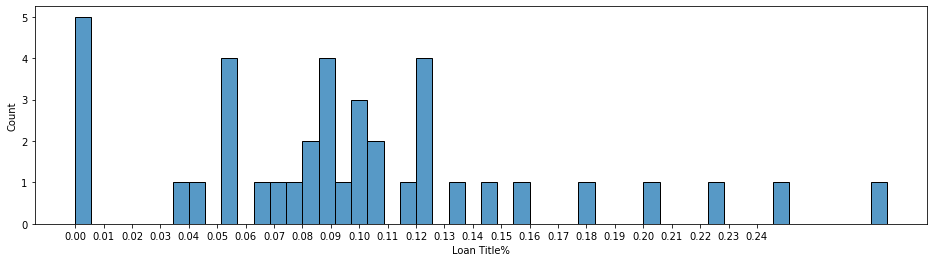

In [49]:
plt.figure(figsize=(16,4))
plt.xticks(np.arange(0, 0.25, 0.01))
sns.histplot(count_sum_df['Loan Title%'],bins=50)

In [50]:
#creating bins
count_sum_df['Bin_LoanTitle']=0
count_sum_df.loc[count_sum_df['Loan Title%']<0.05, 'Bin_LoanTitle']=0
count_sum_df.loc[(count_sum_df['Loan Title%']>=0.05)&(count_sum_df['Loan Title%']<0.085), 'Bin_LoanTitle']=1
count_sum_df.loc[(count_sum_df['Loan Title%']>=0.085)&(count_sum_df['Loan Title%']<0.11), 'Bin_LoanTitle']=2
count_sum_df.loc[(count_sum_df['Loan Title%']>=0.11)&(count_sum_df['Loan Title%']<0.14), 'Bin_LoanTitle']=3
count_sum_df.loc[(count_sum_df['Loan Title%']>=0.14)&(count_sum_df['Loan Title%']<0.18), 'Bin_LoanTitle']=4
count_sum_df.loc[(count_sum_df['Loan Title%']>=0.18)&(count_sum_df['Loan Title%']<0.22), 'Bin_LoanTitle']=5
count_sum_df.loc[count_sum_df['Loan Title%']>=0.22, 'Bin_LoanTitle']=6

In [51]:
dic = dict(zip(count_sum_df['Loan Title'],count_sum_df['Bin_LoanTitle'] ))
train['Loan Title'] = train['Loan Title'].map(dic)
val['Loan Title'] = val['Loan Title'].map(dic)

<AxesSubplot:xlabel='Loan Title', ylabel='Loan Status'>

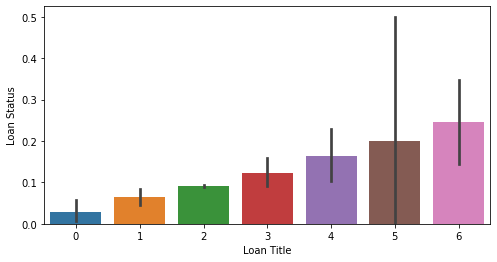

In [52]:
plt.figure(figsize=(8,4))
sns.barplot(train['Loan Title'],train['Loan Status'])

#### Initial List Status

In [53]:
train['Initial List Status'].value_counts()

w    29046
f    24924
Name: Initial List Status, dtype: int64

* Will do one hot encoding on this.

#### Application Type

In [54]:
train['Application Type'].value_counts()

INDIVIDUAL    53877
JOINT            93
Name: Application Type, dtype: int64

* Will do one hot encoding on this.

In [55]:
cat_left = train.select_dtypes('O').columns.to_list()
for col in cat_left:
    print(train[col].value_counts())

MORTGAGE    29116
RENT        19294
OWN          5560
Name: Employment Duration, dtype: int64
Source Verified    26427
Verified           14440
Not Verified       13103
Name: Verification Status, dtype: int64
w    29046
f    24924
Name: Initial List Status, dtype: int64
INDIVIDUAL    53877
JOINT            93
Name: Application Type, dtype: int64


In [56]:
ohe = OneHotEncoder(sparse=False,drop='first')
enc = pd.DataFrame(data=ohe.fit_transform(train[cat_left]),index=train.index,columns=ohe.get_feature_names())
train = pd.concat((train,enc),axis=1)
train.drop(columns=cat_left,inplace=True)

enc = pd.DataFrame(data=ohe.transform(val[cat_left]),index=val.index,columns=ohe.get_feature_names())
val = pd.concat((val,enc),axis=1)
val.drop(columns=cat_left,inplace=True)

### Creating New Columns

**Generating arithematic features using numerical features**

In [57]:
train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Home Ownership,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Bin_Batch_Enrolled,SubGrade%,Debt Consolidation,Credit Card Refinance,x0_OWN,x0_RENT,x1_Source Verified,x1_Verified,x2_w,x3_JOINT
0,25730,11547,12604.564480,59,1586599,11.087502,1,55022.14613,2,13.050075,2,0,13,0,9506,62.466701,12,1270.485253,0.020825,531.852886,0.325771,0,105,47,45598,6341,0,2,0.104255,1,0,0.0,0.0,1.0,0.0,0.0,0.0
1,18918,8329,6011.876768,59,1586599,11.147376,0,60467.97674,2,33.130316,0,2,14,0,26438,50.593387,15,825.435523,0.065797,5.886443,0.740524,0,41,22,58776,17367,0,2,0.091469,1,0,0.0,0.0,0.0,1.0,1.0,0.0
2,16371,10088,21889.541030,59,1586599,11.677196,0,131722.06720,2,19.033124,0,0,29,0,201,67.627665,17,667.139409,0.106359,6.688306,0.716720,0,114,17,404643,2042,0,2,0.070234,0,0,0.0,0.0,0.0,0.0,1.0,0.0
3,7450,18780,10273.838120,59,1586599,16.687688,0,26988.08082,2,14.189902,0,0,13,0,6853,28.595073,20,826.776707,0.090862,6.693900,1.378359,0,22,54,207118,24007,0,2,0.079657,1,0,0.0,0.0,1.0,0.0,0.0,0.0
4,21091,6724,13112.582610,59,1586599,10.005006,1,259043.50980,2,15.787920,0,0,14,0,1644,74.176315,17,727.146621,0.010983,2.835815,0.910756,0,56,30,16737,16073,0,2,0.078759,1,0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
def arithm_feat(val):
    val['l_f_fin_sum']=val['Loan Amount']+val['Funded Amount']+val['Funded Amount Investor']
    val['loan_fun_div']=val['Loan Amount']/val['Funded Amount']
    val['loan_funinve_div']=val['Loan Amount']/val['Funded Amount Investor']
    val['fund_funinv_div']=val['Funded Amount']/val['Funded Amount Investor']

    #set_2 using interest rate debit to income and home ownership
    val['inte_home_div']=val['Home Ownership']/val['Interest Rate']
    val['inte_debit_sum']=val['Interest Rate']+val['Debit to Income']
    val['inte_debit_divi']=val['Interest Rate']/val['Debit to Income']
    val['inte_debit_mult']=val['Interest Rate']*val['Debit to Income']
    val['Home_debit_divi']=val['Home Ownership']/val['Debit to Income']

    #set_3 using delinquency, inquires, open account, public record
    val['dl_in_op_pb']=val['Delinquency - two years']+val['Inquires - six months']+val['Open Account']+val['Public Record']
    val['dl_in_sum']=val['Delinquency - two years']+val['Inquires - six months']
    val['dl_op_sum']=val['Delinquency - two years']+val['Open Account']
    val['dl_pb_sum']=val['Delinquency - two years']+val['Public Record']
    val['in_op_sum']=val['Inquires - six months']+val['Open Account']
    val['op_pb_sum']=val['Open Account']+val['Public Record']

    #set_4 using revolving balance and utilities
    val['revb_ut_sum']=val['Revolving Balance']+val['Revolving Utilities']
    #df['revb_ut_div']=df['Revolving Balance']/df['Revolving Utilities']
    val['revb_ut_mult']=val['Revolving Balance']*val['Revolving Utilities']
    val['revb_ut_sub']=val['Revolving Balance']-val['Revolving Utilities']

    #set_5 using openaccounts and total accounts
    val['opac_totac_sum']=val['Open Account']+val['Total Accounts']
    val['opac_totac_div']=val['Open Account']/val['Total Accounts']
    val['opac_totac_mult']=val['Open Account']*val['Total Accounts']

    #set_6 using total accounts received interest and late fee
    val['to_rec_late']=val['Total Accounts']+val['Total Received Interest']+val['Total Received Late Fee']
    val['to_rec']=val['Total Received Interest']/val['Total Accounts']
    val['to_latefee']=val['Total Received Late Fee']/val['Total Accounts']

    #set_7 using recoveries and collection fee
    val['reco_colle_sum']=val['Recoveries']+val['Collection Recovery Fee']
    val['reco_colle_mult']=val['Recoveries']*val['Collection Recovery Fee']
    #df['reco_colle_divi']=df['Recoveries']/df['Collection Recovery Fee']

    #set_8 using latweekpay totalamount balance and credit limit
    val['lastweek_sum']=val['Last week Pay']+val['Total Collection Amount']+val['Total Current Balance']+val['Total Revolving Credit Limit']
    val['last_total_mult']=val['Last week Pay']*val['Total Collection Amount']
    #val['last_total_divi']=val['Last week Pay']/val['Total Collection Amount']
    val['totalc_limit']=val['Total Current Balance']+val['Total Revolving Credit Limit']
    val['totalc_limit_div']=val['Total Current Balance']/val['Total Revolving Credit Limit']
    return val

In [59]:
train = arithm_feat(train)
val = arithm_feat(val)

### Using PCA to create new features

In [60]:
from sklearn.decomposition import PCA

In [61]:
%%time

pca = PCA(n_components=12,random_state=42)
cmpnt = pca.fit_transform(train.values)

CPU times: user 859 ms, sys: 643 ms, total: 1.5 s
Wall time: 784 ms


In [62]:
cmpnt.shape

(53970, 12)

In [63]:
for i in range(cmpnt.shape[1]):
    train[f'pca_{i+1}'] = cmpnt[:, i]
    
print(train.shape)

(53970, 79)


In [64]:
cmps = pca.transform(val.values)
for i in range(cmps.shape[1]):
    val[f'pca_{i+1}'] = cmps[:, i]
    
print(val.shape)

(13493, 79)


### Using Clustering to create a new column

In [65]:
from sklearn.cluster import KMeans

In [66]:
# Fit the KMeans model to X_scaled and create the cluster labels
kmeans = KMeans(n_clusters=2, n_init=50, random_state=0)
train["Cluster"] = kmeans.fit_predict(train.values)

In [67]:
val['Cluster'] = kmeans.predict(val.values)

In [68]:
X, y = train.drop(columns='Loan Status'), train['Loan Status']

In [69]:
X.shape

(53970, 79)

## Permutation Importance using Random Forest

In [70]:
import eli5
from eli5.sklearn import PermutationImportance
rf= RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X,y)
perm = PermutationImportance(rf, random_state=0).fit(X, y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0408 ± 0.0015,SubGrade%
0.0222 ± 0.0003,Bin_Batch_Enrolled
0.0171 ± 0.0008,Total Collection Amount
0.0116 ± 0.0003,last_total_mult
0.0086 ± 0.0004,Collection Recovery Fee
0.0074 ± 0.0004,pca_4
0.0063 ± 0.0006,Term
0.0047 ± 0.0002,opac_totac_mult
0.0036 ± 0.0002,Total Received Late Fee
0.0035 ± 0.0003,pca_1


In [71]:
i = list(perm.feature_importances_)
c = X.columns.to_list()
im = pd.DataFrame(data=[i,c]).T.sort_values(by=0,ascending=False,ignore_index=True)
im

,0,1
0,0.04083,SubGrade%
1,0.022216,Bin_Batch_Enrolled
2,0.017069,Total Collection Amount
3,0.011636,last_total_mult
4,0.008594,Collection Recovery Fee
5,0.007449,pca_4
6,0.006278,Term
7,0.004669,opac_totac_mult
8,0.003587,Total Received Late Fee
9,0.003539,pca_1


In [72]:
#filtering the significant columns
selected_cols = im.iloc[:66,1].to_list()
features = selected_cols.copy()
selected_cols.append('Loan Status')
df = train[selected_cols]
trainx, valx, trainy, valy = train_test_split(df[features],df['Loan Status'],test_size=0.15,random_state=0,stratify=y)

In [73]:
testx, testy = val[features],val['Loan Status']

In [74]:
forest = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=0,oob_score=True)
forest.fit(trainx,trainy)
print(log_loss(trainy,forest.predict_proba(trainx)))
print(log_loss(valy,forest.predict_proba(valx)))
print(log_loss(testy,forest.predict_proba(testx)))

0.2850986579020933
0.30804761796191077
0.30886460150791256


In [75]:
removed_cols  = ['Cluster','Collection 12 months Medical','Credit Card Refinance','Debt Consolidation','Delinquency - two years','Grade','x0_OWN'
, 'x0_RENT','x1_Source Verified','x1_Verified','x2_w','x3_JOINT']

### Hyperparameter tuning using optuna


#### Tuning LGBM 

In [76]:
import optuna
def objective(trial,data=df[features] ,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
        'device':'gpu',  # this parameter means using the GPU when training our model to speedup the training process
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 1000,
        'num_leaves': trial.suggest_int('num_leaves', 34, 300),
        'min_child_samples':trial.suggest_int('min_child_samples', 100, 500),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = LGBMClassifier(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict_proba(test_x)[:,1]
    loss = log_loss(test_y, preds)
    return loss

In [472]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-09-18 14:08:11,787] A new study created in memory with name: no-name-d64dc1ad-63e0-4441-a223-d3899ea4028e
[I 2022-09-18 14:08:17,419] Trial 0 finished with value: 0.3016328978246802 and parameters: {'reg_lambda': 0.05903347875168973, 'reg_alpha': 0.0019898485930887884, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.01, 'num_leaves': 71, 'min_child_samples': 441, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 20}. Best is trial 0 with value: 0.3016328978246802.
[I 2022-09-18 14:08:23,730] Trial 1 finished with value: 0.3016338645465851 and parameters: {'reg_lambda': 0.04806039801045863, 'reg_alpha': 0.5791527883511111, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.009, 'num_leaves': 70, 'min_child_samples': 323, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 13}. Best is trial 0 with value: 0.3016328978246802.
[I 2022-09-18 14:08:30,430] Trial 2 finished with value: 0.3017202548116572 and parameters: {'reg_lambda': 6.704594649

Number of finished trials: 20
Best trial: {'reg_lambda': 2.9979770025338834, 'reg_alpha': 0.004911106058021785, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.012, 'num_leaves': 130, 'min_child_samples': 499, 'max_depth': 7, 'random_state': 48, 'min_child_weight': 293}


In [77]:
Best_trial = {'reg_lambda': 2.9979770025338834, 'reg_alpha': 0.004911106058021785, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.012, 
              'num_leaves': 130, 'min_child_samples': 499, 'max_depth': 7, 'random_state': 48, 'min_child_weight': 293}
fit_params = {'verbose': 0, 'early_stopping_rounds': 100}

In [78]:
def run_clf_kfold(clf,fit_params, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train['Loan Status'])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], y.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], y.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = log_loss(y_val, preds_val)
    print(f'\nloss score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = log_loss(y, oofs)
  print(f'\n\nloss score for oofs is {oofs_score}')

  return oofs, preds

In [79]:
lgbm=LGBMClassifier(**Best_trial)

In [83]:
lgb_oofs, lgb_preds =run_clf_kfold(lgbm,fit_params, df,val, features)


------------- Fold 1 -------------

loss score for validation set is 0.30731231190260305

------------- Fold 2 -------------

loss score for validation set is 0.3078530549931527

------------- Fold 3 -------------

loss score for validation set is 0.307366484585482

------------- Fold 4 -------------

loss score for validation set is 0.3077845200931485

------------- Fold 5 -------------

loss score for validation set is 0.3079167295989571


loss score for oofs is 0.3076466202346687


In [85]:
log_loss(testy,lgb_preds)

0.3081485778766251

#### Tuning Random Forest

In [80]:
def objective(trial,data=df[features] ,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 400),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 15),
        }
    model1 = RandomForestClassifier(**param)  
    
    model1.fit(train_x,train_y)
    
    preds = model1.predict_proba(test_x)[:,1]
    loss = log_loss(test_y, preds)
    return loss

In [498]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-09-18 14:27:00,581] A new study created in memory with name: no-name-6a63854a-d202-478b-be91-6f24c3ef367f
[I 2022-09-18 14:27:20,367] Trial 0 finished with value: 0.3027824736129015 and parameters: {'n_estimators': 77, 'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.3027824736129015.
[I 2022-09-18 14:27:45,863] Trial 1 finished with value: 0.3025346637683566 and parameters: {'n_estimators': 156, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.3025346637683566.
[I 2022-09-18 14:28:11,684] Trial 2 finished with value: 0.3027694571726651 and parameters: {'n_estimators': 92, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.3025346637683566.
[I 2022-09-18 14:28:47,175] Trial 3 finished with value: 0.30253467980207344 and parameters: {'n_estimators': 367, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 15}. Best is trial 1 with valu

Number of finished trials: 20
Best trial: {'n_estimators': 185, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 6}


In [81]:
best_trial = {'n_estimators': 185, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 6}
rf = RandomForestClassifier(**best_trial)

In [82]:
rf_oofs, rf_preds =run_clf_kfold(rf,fit_params, df,val, features)


------------- Fold 1 -------------

loss score for validation set is 0.3080997354460489

------------- Fold 2 -------------

loss score for validation set is 0.3139704167902192

------------- Fold 3 -------------

loss score for validation set is 0.30758482884642074

------------- Fold 4 -------------

loss score for validation set is 0.30786650919586733

------------- Fold 5 -------------

loss score for validation set is 0.30833002511686025


loss score for oofs is 0.3091703030790833


In [86]:
log_loss(testy,rf_preds)

0.30794241174247416

#### Tuning CatBoost

In [93]:
fit_params = {'verbose': 2, 'early_stopping_rounds': 100}

In [107]:
def objective(trial,data=df[features] ,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {}
    param['iterations']= trial.suggest_int('iterations', 50, 300)
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
    param['depth'] = trial.suggest_int('depth', 9, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    model2 = CatBoostClassifier(**param)  
    model2.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=True)
    
    preds = model2.predict_proba(test_x)[:,1]
    loss = log_loss(test_y, preds)
    return loss

In [108]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-09-18 18:02:32,638] A new study created in memory with name: no-name-09d557d5-2860-4a28-9eb0-dd488f6d3577


0:	learn: 0.6781659	test: 0.6782695	best: 0.6782695 (0)	total: 1.24s	remaining: 3m 44s
1:	learn: 0.6635963	test: 0.6640904	best: 0.6640904 (1)	total: 2.47s	remaining: 3m 43s
2:	learn: 0.6495023	test: 0.6504220	best: 0.6504220 (2)	total: 3.69s	remaining: 3m 41s
3:	learn: 0.6362691	test: 0.6372353	best: 0.6372353 (3)	total: 4.94s	remaining: 3m 41s
4:	learn: 0.6234076	test: 0.6245231	best: 0.6245231 (4)	total: 7.38s	remaining: 4m 22s
5:	learn: 0.6110316	test: 0.6124795	best: 0.6124795 (5)	total: 8.63s	remaining: 4m 14s
6:	learn: 0.5991292	test: 0.6008023	best: 0.6008023 (6)	total: 9.87s	remaining: 4m 8s
7:	learn: 0.5875082	test: 0.5894845	best: 0.5894845 (7)	total: 11.1s	remaining: 4m 3s
8:	learn: 0.5765045	test: 0.5786897	best: 0.5786897 (8)	total: 12.4s	remaining: 3m 59s
9:	learn: 0.5655063	test: 0.5681202	best: 0.5681202 (9)	total: 13.6s	remaining: 3m 55s
10:	learn: 0.5550980	test: 0.5580278	best: 0.5580278 (10)	total: 15s	remaining: 3m 53s
11:	learn: 0.5451162	test: 0.5483197	best: 0.

[I 2022-09-18 18:06:36,635] Trial 0 finished with value: 0.30265461099112245 and parameters: {'iterations': 183, 'learning_rate': 0.016, 'depth': 13, 'l2_leaf_reg': 3.0, 'min_child_samples': 4}. Best is trial 0 with value: 0.30265461099112245.


182:	learn: 0.2246754	test: 0.3026670	best: 0.3026546 (181)	total: 4m 3s	remaining: 0us

bestTest = 0.302654611
bestIteration = 181

Shrink model to first 182 iterations.
0:	learn: 0.6817209	test: 0.6819437	best: 0.6819437 (0)	total: 5.11s	remaining: 19m 29s
1:	learn: 0.6706778	test: 0.6711469	best: 0.6711469 (1)	total: 9.91s	remaining: 18m 50s
2:	learn: 0.6595679	test: 0.6607253	best: 0.6607253 (2)	total: 14.7s	remaining: 18m 34s
3:	learn: 0.6488935	test: 0.6504406	best: 0.6504406 (3)	total: 20.8s	remaining: 19m 33s
4:	learn: 0.6388007	test: 0.6405573	best: 0.6405573 (4)	total: 25.6s	remaining: 19m 11s
5:	learn: 0.6289373	test: 0.6308387	best: 0.6308387 (5)	total: 30.9s	remaining: 19m 13s
6:	learn: 0.6191621	test: 0.6213016	best: 0.6213016 (6)	total: 35.6s	remaining: 18m 54s
7:	learn: 0.6097889	test: 0.6122733	best: 0.6122733 (7)	total: 40.9s	remaining: 18m 56s
8:	learn: 0.6008404	test: 0.6034466	best: 0.6034466 (8)	total: 45.7s	remaining: 18m 41s
9:	learn: 0.5921326	test: 0.5948682	b

[I 2022-09-18 18:26:08,172] Trial 1 finished with value: 0.30250978213829927 and parameters: {'iterations': 230, 'learning_rate': 0.012, 'depth': 14, 'l2_leaf_reg': 2.5, 'min_child_samples': 4}. Best is trial 1 with value: 0.30250978213829927.


0:	learn: 0.6783811	test: 0.6784563	best: 0.6784563 (0)	total: 1.26s	remaining: 2m 32s
1:	learn: 0.6641200	test: 0.6643698	best: 0.6643698 (1)	total: 2.49s	remaining: 2m 29s
2:	learn: 0.6504041	test: 0.6508894	best: 0.6508894 (2)	total: 3.73s	remaining: 2m 27s
3:	learn: 0.6372490	test: 0.6377712	best: 0.6377712 (3)	total: 4.96s	remaining: 2m 26s
4:	learn: 0.6245965	test: 0.6251370	best: 0.6251370 (4)	total: 6.2s	remaining: 2m 24s
5:	learn: 0.6124787	test: 0.6132903	best: 0.6132903 (5)	total: 7.42s	remaining: 2m 23s
6:	learn: 0.6007715	test: 0.6016427	best: 0.6016427 (6)	total: 8.68s	remaining: 2m 22s
7:	learn: 0.5894513	test: 0.5905635	best: 0.5905635 (7)	total: 10.4s	remaining: 2m 27s
8:	learn: 0.5786654	test: 0.5798174	best: 0.5798174 (8)	total: 11.7s	remaining: 2m 26s
9:	learn: 0.5681475	test: 0.5693348	best: 0.5693348 (9)	total: 12s	remaining: 2m 14s
10:	learn: 0.5579548	test: 0.5593767	best: 0.5593767 (10)	total: 14s	remaining: 2m 21s
11:	learn: 0.5482621	test: 0.5500121	best: 0.5

[I 2022-09-18 18:28:49,620] Trial 2 finished with value: 0.30807090073313737 and parameters: {'iterations': 122, 'learning_rate': 0.016, 'depth': 13, 'l2_leaf_reg': 5.5, 'min_child_samples': 8}. Best is trial 1 with value: 0.30250978213829927.


121:	learn: 0.2724284	test: 0.3080709	best: 0.3080709 (121)	total: 2m 40s	remaining: 0us

bestTest = 0.3080709007
bestIteration = 121

0:	learn: 0.6773806	test: 0.6773451	best: 0.6773451 (0)	total: 212ms	remaining: 21.2s
1:	learn: 0.6622264	test: 0.6622051	best: 0.6622051 (1)	total: 427ms	remaining: 21.1s
2:	learn: 0.6474988	test: 0.6476214	best: 0.6476214 (2)	total: 644ms	remaining: 21s
3:	learn: 0.6333836	test: 0.6336091	best: 0.6336091 (3)	total: 866ms	remaining: 21s
4:	learn: 0.6196995	test: 0.6201086	best: 0.6201086 (4)	total: 1.09s	remaining: 20.9s
5:	learn: 0.6068387	test: 0.6073085	best: 0.6073085 (5)	total: 1.3s	remaining: 20.5s
6:	learn: 0.5945272	test: 0.5949932	best: 0.5949932 (6)	total: 1.51s	remaining: 20.3s
7:	learn: 0.5827250	test: 0.5831948	best: 0.5831948 (7)	total: 1.72s	remaining: 20s
8:	learn: 0.5713419	test: 0.5718366	best: 0.5718366 (8)	total: 1.94s	remaining: 19.8s
9:	learn: 0.5606094	test: 0.5610466	best: 0.5610466 (9)	total: 2.34s	remaining: 21.3s
10:	learn: 0

[I 2022-09-18 18:29:13,616] Trial 3 finished with value: 0.31047247443018977 and parameters: {'iterations': 101, 'learning_rate': 0.017, 'depth': 10, 'l2_leaf_reg': 1.5, 'min_child_samples': 16}. Best is trial 1 with value: 0.30250978213829927.


100:	learn: 0.3010088	test: 0.3104725	best: 0.3104725 (100)	total: 23.6s	remaining: 0us

bestTest = 0.3104724744
bestIteration = 100

0:	learn: 0.6790631	test: 0.6793154	best: 0.6793154 (0)	total: 5.13s	remaining: 14m 37s
1:	learn: 0.6655114	test: 0.6660298	best: 0.6660298 (1)	total: 9.93s	remaining: 14m 3s
2:	learn: 0.6523340	test: 0.6534385	best: 0.6534385 (2)	total: 15.2s	remaining: 14m 14s
3:	learn: 0.6395283	test: 0.6410651	best: 0.6410651 (3)	total: 20.4s	remaining: 14m 18s
4:	learn: 0.6274073	test: 0.6291644	best: 0.6291644 (4)	total: 26s	remaining: 14m 27s
5:	learn: 0.6156361	test: 0.6175418	best: 0.6175418 (5)	total: 30.7s	remaining: 14m 10s
6:	learn: 0.6040635	test: 0.6062351	best: 0.6062351 (6)	total: 36s	remaining: 14m 8s
7:	learn: 0.5930736	test: 0.5956183	best: 0.5956183 (7)	total: 40.8s	remaining: 13m 55s
8:	learn: 0.5826133	test: 0.5852773	best: 0.5852773 (8)	total: 46.1s	remaining: 13m 55s
9:	learn: 0.5724995	test: 0.5752986	best: 0.5752986 (9)	total: 51s	remaining: 13

[I 2022-09-18 18:43:46,159] Trial 4 finished with value: 0.30384927607111534 and parameters: {'iterations': 172, 'learning_rate': 0.015, 'depth': 14, 'l2_leaf_reg': 3.5, 'min_child_samples': 16}. Best is trial 1 with value: 0.30250978213829927.


Number of finished trials: 5
Best trial: {'iterations': 230, 'learning_rate': 0.012, 'depth': 14, 'l2_leaf_reg': 2.5, 'min_child_samples': 4}


In [109]:
best_trial = study.best_trial.params
cat = CatBoostClassifier(**best_trial)

In [110]:
cat_oofs, cat_preds =run_clf_kfold(cat,fit_params, df,val, features)


------------- Fold 1 -------------
0:	learn: 0.6816403	total: 4.8s	remaining: 18m 18s
1:	learn: 0.6705742	total: 10s	remaining: 19m
2:	learn: 0.6594280	total: 14.9s	remaining: 18m 44s
3:	learn: 0.6487078	total: 20.6s	remaining: 19m 22s
4:	learn: 0.6385791	total: 25.7s	remaining: 19m 15s
5:	learn: 0.6286819	total: 31s	remaining: 19m 16s
6:	learn: 0.6188440	total: 35.7s	remaining: 18m 56s
7:	learn: 0.6093857	total: 40.5s	remaining: 18m 43s
8:	learn: 0.6003920	total: 45.6s	remaining: 18m 38s
9:	learn: 0.5917097	total: 50.3s	remaining: 18m 25s
10:	learn: 0.5830828	total: 56.3s	remaining: 18m 39s
11:	learn: 0.5743576	total: 1m 1s	remaining: 18m 29s
12:	learn: 0.5661904	total: 1m 6s	remaining: 18m 29s
13:	learn: 0.5581491	total: 1m 11s	remaining: 18m 20s
14:	learn: 0.5503141	total: 1m 16s	remaining: 18m 18s
15:	learn: 0.5430802	total: 1m 21s	remaining: 18m 10s
16:	learn: 0.5353318	total: 1m 27s	remaining: 18m 15s
17:	learn: 0.5283474	total: 1m 32s	remaining: 18m 7s
18:	learn: 0.5212609	tota

In [111]:
log_loss(testy,cat_preds)

0.3083853871657349

### Ensembling the three models

In [18]:
lgb_preds[:3] ,rf_preds[:3] ,cat_preds[:3]

(array([0.08391957, 0.10620342, 0.09494975]),
 array([0.08311496, 0.09210438, 0.08704855]),
 array([0.07713118, 0.09054465, 0.09771561]))

In [ ]:
op = pd.DataFrame(np.array([lgb_preds,rf_preds,cat_preds]),index=['lgb', 'rf', 'cat']).T
op = pd.concat([op,testy],axis=1)
op['combo']= 0.30*op['lgb']+0.40*op['rf']+0.30*op['cat']

In [22]:
log_loss(testy,op['lgb']),log_loss(testy,op['rf']),log_loss(testy,op['cat']),log_loss(testy,op['combo'])

(0.3081485778766251, 0.307983668554398, 0.3083853871657349, 0.3079403275301269)